In [1]:
import numpy as np
import matplotlib.pyplot as plt
from regions import Regions
import regions
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u

from smart_plotters.jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
from smart_plotters.cutout_plot import get_cutout_405

In [2]:
cat_use = make_cat_use()
cat_brick = make_brick_cat()

Reading /orange/adamginsburg/jwst/brick/catalogs/basic_merged_indivexp_photometry_tables_merged_qualcuts_oksep2221.fits


In [3]:
pos = SkyCoord('17:46:20.6290029866', '-28:37:49.5114204513', unit=(u.hour, u.deg))
l = 113.8*u.arcsec
w = 3.3*u.arcmin
reg = regions.RectangleSkyRegion(pos, width=l, height=w)

#cutout_filament = cm.Cutout(pos, w, l)
cutout_405 = get_cutout_405(pos, w, l)
nancutout = cutout_405.data*np.nan

# Plotting Av vs GLON

In [4]:
cat_use.catalog['skycoord_ref'].galactic.l

<Longitude [0.39862173, 0.39746676, 0.39502992, ..., 0.37842008,
            0.39134437, 0.39122065] deg>

In [5]:
cat_use.catalog['Av'] = cat_use.get_Av('f182m', 'f212n')
cat_brick.catalog['Av'] = cat_brick.get_Av('f182m', 'f212n')

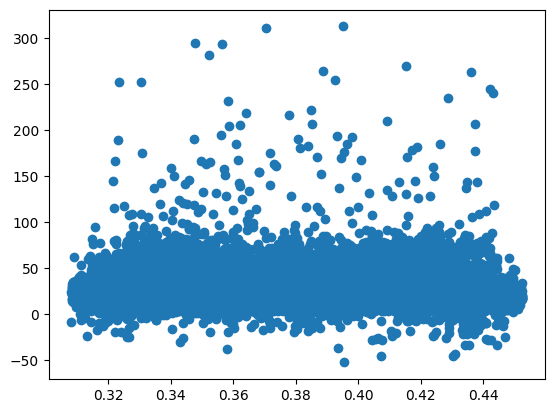

In [6]:
plt.scatter(cat_use.catalog['skycoord_ref'].galactic.l, cat_use.catalog['Av'])

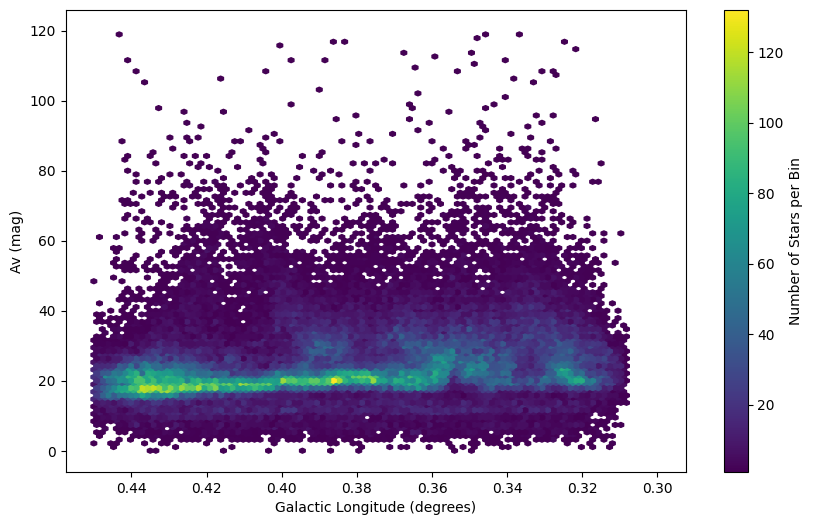

In [7]:
fig = plt.figure(figsize=(10, 6))
plt.hexbin(cat_use.catalog['skycoord_ref'].galactic.l, cat_use.catalog['Av'], gridsize=100, cmap='viridis', extent=(0.3, 0.45, 0, 120), mincnt=1)
plt.xlabel('Galactic Longitude (degrees)')
plt.ylabel('Av (mag)')
plt.colorbar(label='Number of Stars per Bin')

plt.gca().invert_xaxis()

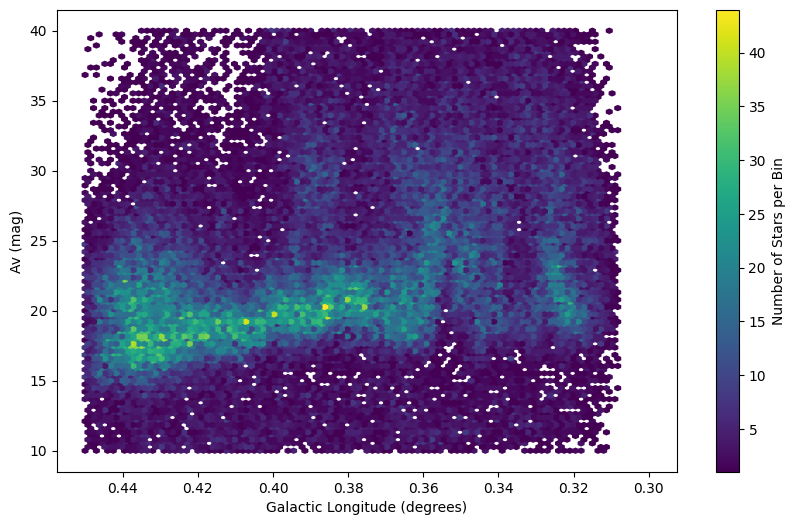

In [8]:
fig = plt.figure(figsize=(10, 6))
plt.hexbin(cat_use.catalog['skycoord_ref'].galactic.l, cat_use.catalog['Av'], gridsize=100, cmap='viridis', extent=(0.3, 0.45, 10, 40), mincnt=1)
plt.xlabel('Galactic Longitude (degrees)')
plt.ylabel('Av (mag)')
plt.colorbar(label='Number of Stars per Bin')

plt.gca().invert_xaxis()

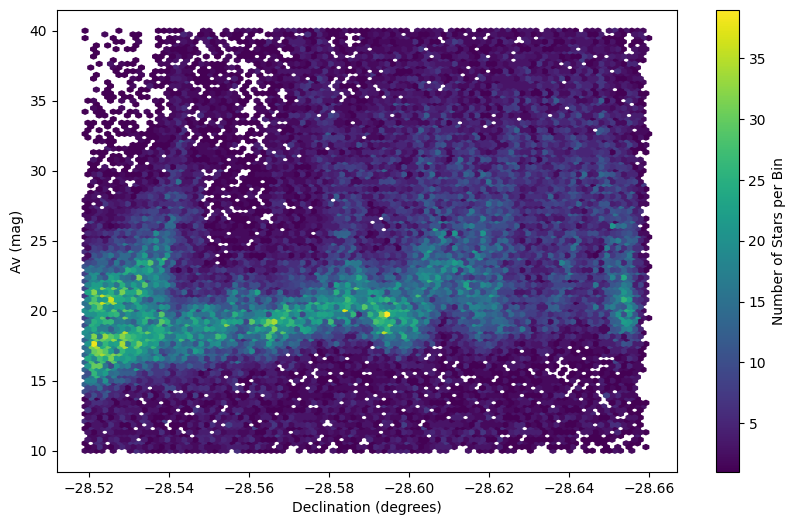

In [9]:
fig = plt.figure(figsize=(10, 6))
plt.hexbin(cat_use.catalog['skycoord_ref'].dec, cat_use.catalog['Av'], gridsize=100, cmap='viridis', mincnt=1, extent=(-28.66, -28.519, 10, 40))
plt.xlabel('Declination (degrees)')
plt.ylabel('Av (mag)')
plt.colorbar(label='Number of Stars per Bin')

plt.gca().invert_xaxis()

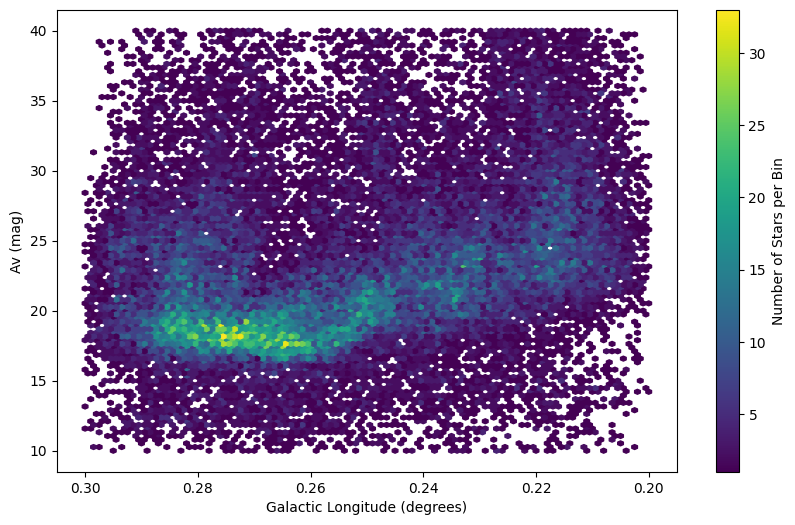

In [10]:
fig = plt.figure(figsize=(10, 6))
plt.hexbin(cat_brick.catalog['skycoord_ref'].galactic.l, cat_brick.catalog['Av'], gridsize=100, cmap='viridis', extent=(0.2, 0.3, 10, 40), mincnt=1)
plt.xlabel('Galactic Longitude (degrees)')
plt.ylabel('Av (mag)')
plt.colorbar(label='Number of Stars per Bin')

plt.gca().invert_xaxis()

In [11]:
from astropy.table import vstack
cat_use_plus_brick = JWSTCatalog(vstack([cat_use.catalog, cat_brick.catalog]))

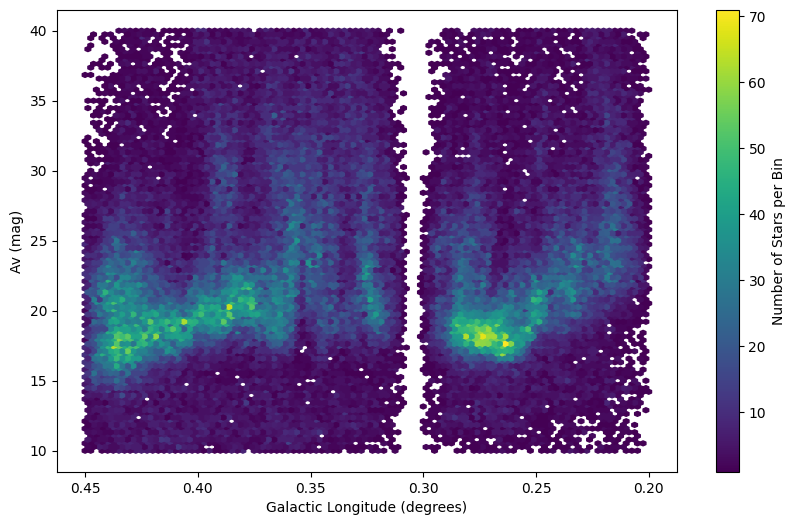

In [12]:
fig = plt.figure(figsize=(10, 6))
plt.hexbin(cat_use_plus_brick.catalog['skycoord_ref'].galactic.l, cat_use_plus_brick.catalog['Av'], gridsize=100, cmap='viridis', extent=(0.2, 0.45, 10, 40), mincnt=1)
plt.xlabel('Galactic Longitude (degrees)')
plt.ylabel('Av (mag)')
plt.colorbar(label='Number of Stars per Bin')

plt.gca().invert_xaxis()

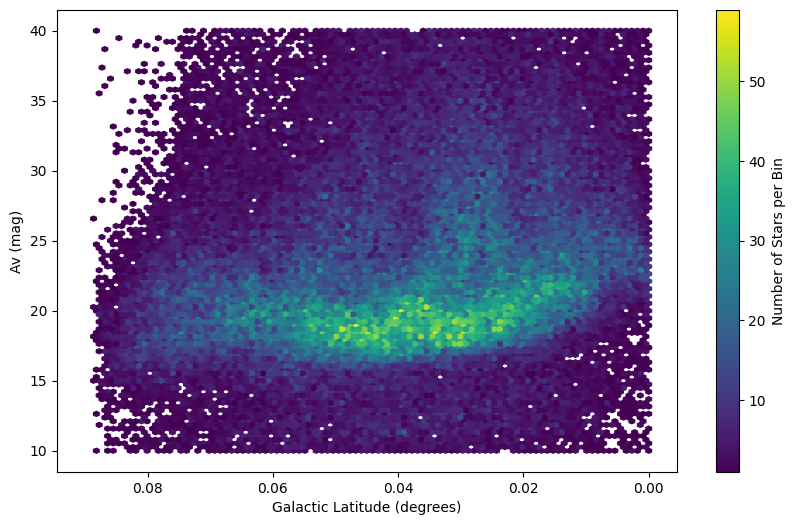

In [13]:
fig = plt.figure(figsize=(10, 6))
plt.hexbin(cat_use_plus_brick.catalog['skycoord_ref'].galactic.b, cat_use_plus_brick.catalog['Av'], gridsize=100, cmap='viridis', extent=(0., 0.09, 10, 40), mincnt=1)
plt.xlabel('Galactic Latitude (degrees)')
plt.ylabel('Av (mag)')
plt.colorbar(label='Number of Stars per Bin')

plt.gca().invert_xaxis()

# Masking Clouds

In [14]:
reg_f = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/filament_short.region')
reg_c1 = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/cloudc1.region')
reg_c2 = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/cloudc2.region')
reg_d = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/cloudd.region')

In [15]:
reg_clouds = [reg_f[0], reg_c1[0], reg_c2[0], reg_d[0]]

In [16]:
cat_clouds = JWSTCatalog(cat_use.table_region_mask(reg_clouds, cutout_405.wcs))
cat_noclouds = JWSTCatalog(cat_use.catalog[~cat_use.get_region_mask(reg_clouds, cutout_405.wcs)])

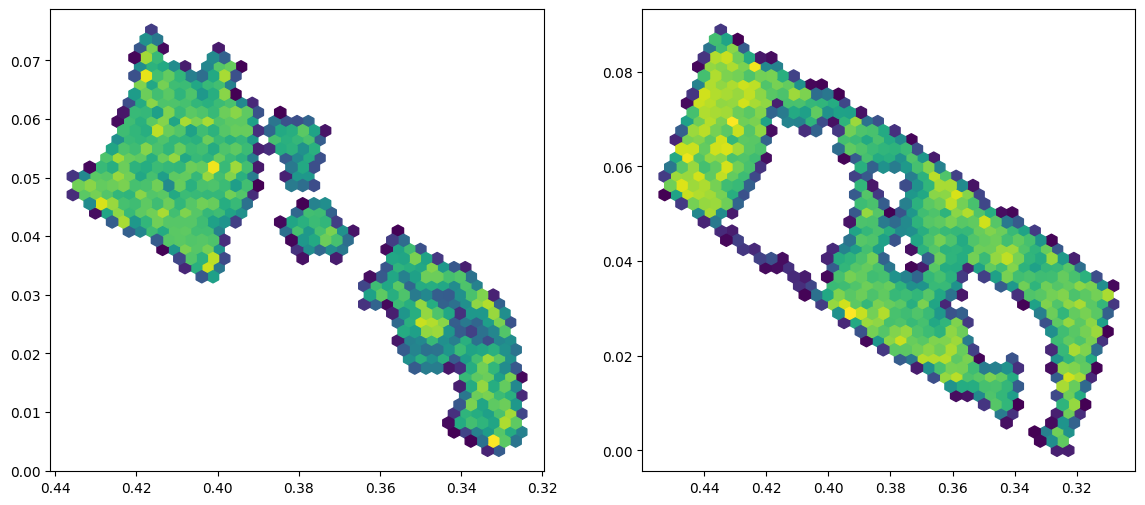

In [17]:
fig = plt.figure(figsize=(14, 6))

ax = plt.subplot(121)
#ax.imshow(nancutout)
ax.hexbin(cat_clouds.catalog['skycoord_ref'].galactic.l, cat_clouds.catalog['skycoord_ref'].galactic.b, gridsize=40, cmap='viridis', mincnt=1)
plt.gca().invert_xaxis()

ax = plt.subplot(122)
#ax.imshow(nancutout)
ax.hexbin(cat_noclouds.catalog['skycoord_ref'].galactic.l, cat_noclouds.catalog['skycoord_ref'].galactic.b, gridsize=40, cmap='viridis', mincnt=1)
plt.gca().invert_xaxis()

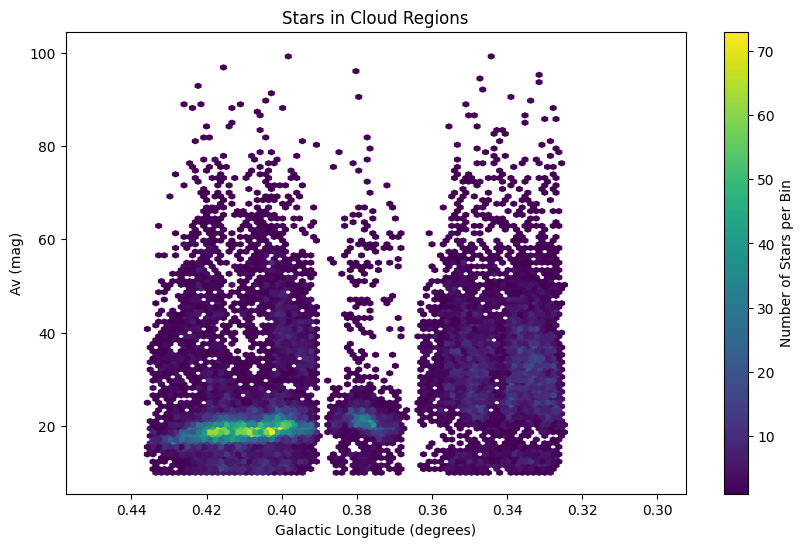

In [18]:
fig = plt.figure(figsize=(10, 6))
plt.hexbin(cat_clouds.catalog['skycoord_ref'].galactic.l, cat_clouds.catalog['Av'], gridsize=100, cmap='viridis', extent=(0.3, 0.45, 10, 100), mincnt=1)
plt.xlabel('Galactic Longitude (degrees)')
plt.ylabel('Av (mag)')
plt.colorbar(label='Number of Stars per Bin')
plt.title('Stars in Cloud Regions')

plt.gca().invert_xaxis()

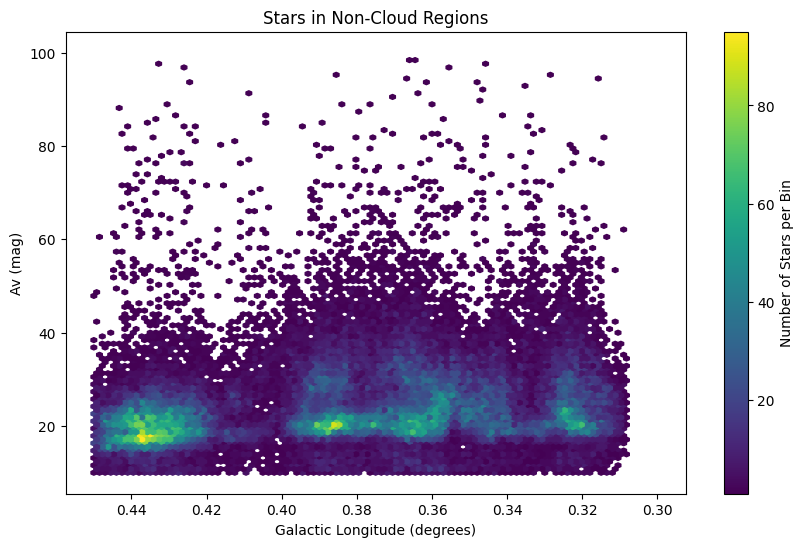

In [19]:
fig = plt.figure(figsize=(10, 6))
plt.hexbin(cat_noclouds.catalog['skycoord_ref'].galactic.l, cat_noclouds.catalog['Av'], gridsize=100, cmap='viridis', extent=(0.3, 0.45, 10, 100), mincnt=1)
plt.xlabel('Galactic Longitude (degrees)')
plt.ylabel('Av (mag)')
plt.colorbar(label='Number of Stars per Bin')
plt.title('Stars in Non-Cloud Regions')

plt.gca().invert_xaxis()

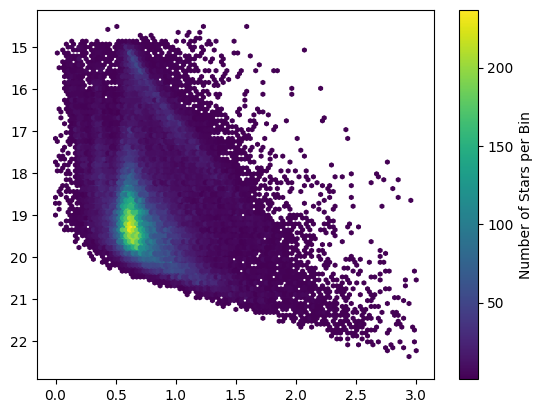

In [ ]:
im = plt.hexbin(cat_use.color('f182m', 'f212n'), cat_use.band('f182m'), gridsize=100, cmap='viridis', mincnt=1, extent=(0, 3, 14.5, 22.5))
plt.colorbar(im, label='Number of Stars per Bin')

plt.gca().invert_yaxis()

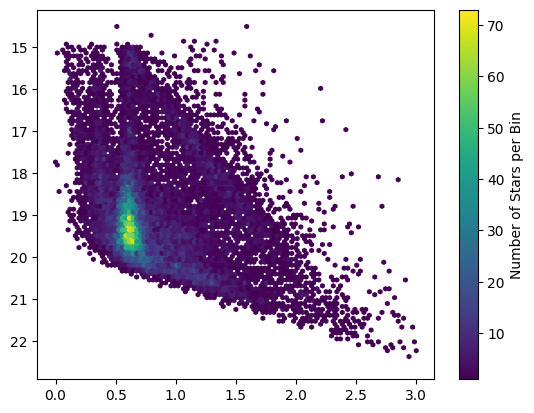

In [42]:
im = plt.hexbin(cat_clouds.color('f182m', 'f212n'), cat_clouds.band('f182m'), gridsize=100, cmap='viridis', mincnt=1, extent=(0, 3, 14.5, 22.5))
plt.colorbar(im, label='Number of Stars per Bin')

plt.gca().invert_yaxis()

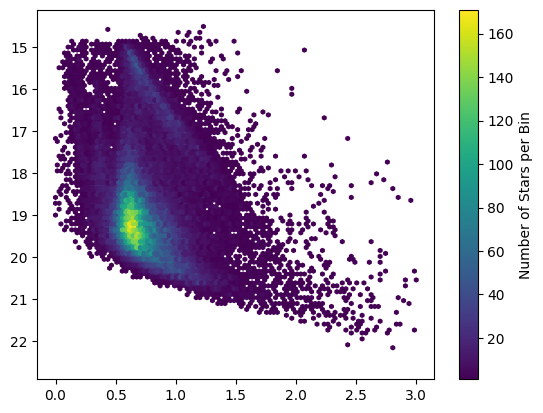

In [43]:
im = plt.hexbin(cat_noclouds.color('f182m', 'f212n'), cat_noclouds.band('f182m'), gridsize=100, cmap='viridis', mincnt=1, extent=(0, 3, 14.5, 22.5))
plt.colorbar(im, label='Number of Stars per Bin')

plt.gca().invert_yaxis()

# Chunked Slices

In [29]:
mask_14_16 = (cat_use.catalog['Av'] < 16) & (cat_use.catalog['Av'] >= 14)
mask_16_18 = (cat_use.catalog['Av'] < 18) & (cat_use.catalog['Av'] >= 16)
mask_18_20 = (cat_use.catalog['Av'] < 20) & (cat_use.catalog['Av'] >= 18)
mask_20_22 = (cat_use.catalog['Av'] < 22) & (cat_use.catalog['Av'] >= 20)
mask_22_24 = (cat_use.catalog['Av'] < 24) & (cat_use.catalog['Av'] >= 22)
mask_24_26 = (cat_use.catalog['Av'] < 26) & (cat_use.catalog['Av'] >= 24)
mask_26_28 = (cat_use.catalog['Av'] < 28) & (cat_use.catalog['Av'] >= 26)
mask_28_30 = (cat_use.catalog['Av'] < 30) & (cat_use.catalog['Av'] >= 28)
mask_30_32 = (cat_use.catalog['Av'] < 32) & (cat_use.catalog['Av'] >= 30)
mask_32_34 = (cat_use.catalog['Av'] < 34) & (cat_use.catalog['Av'] >= 32)
mask_34_36 = (cat_use.catalog['Av'] < 36) & (cat_use.catalog['Av'] >= 34)


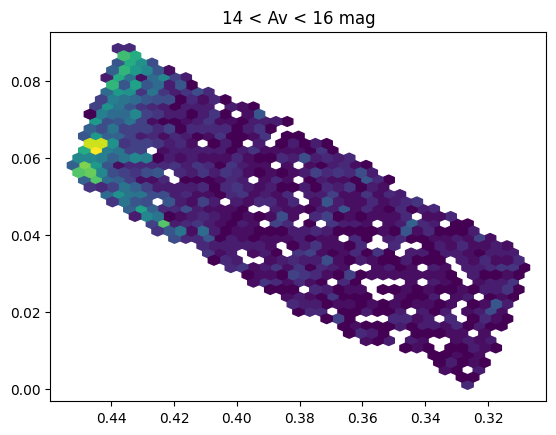

In [22]:
plt.hexbin(cat_use.catalog['skycoord_ref'].galactic.l[mask_14_16], cat_use.catalog['skycoord_ref'].galactic.b[mask_14_16], gridsize=40, cmap='viridis', mincnt=1)
plt.title('14 < Av < 16 mag')
plt.gca().invert_xaxis()

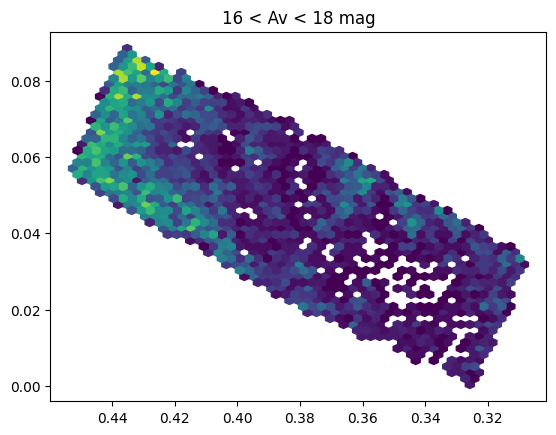

In [23]:
plt.hexbin(cat_use.catalog['skycoord_ref'].galactic.l[mask_16_18], cat_use.catalog['skycoord_ref'].galactic.b[mask_16_18], gridsize=50, cmap='viridis', mincnt=1)
plt.title('16 < Av < 18 mag')
plt.gca().invert_xaxis()

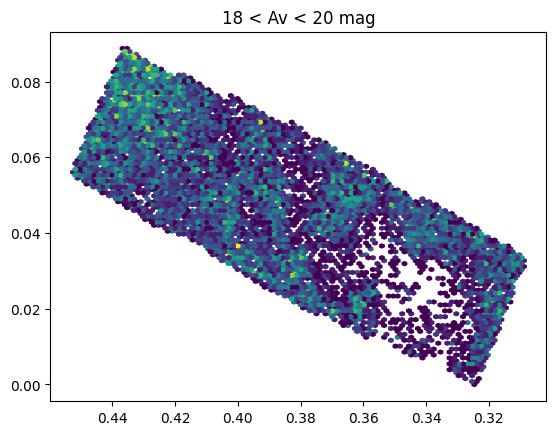

In [24]:
plt.hexbin(cat_use.catalog['skycoord_ref'].galactic.l[mask_18_20], cat_use.catalog['skycoord_ref'].galactic.b[mask_18_20], gridsize=100, cmap='viridis', mincnt=1)
plt.title('18 < Av < 20 mag')
plt.gca().invert_xaxis()

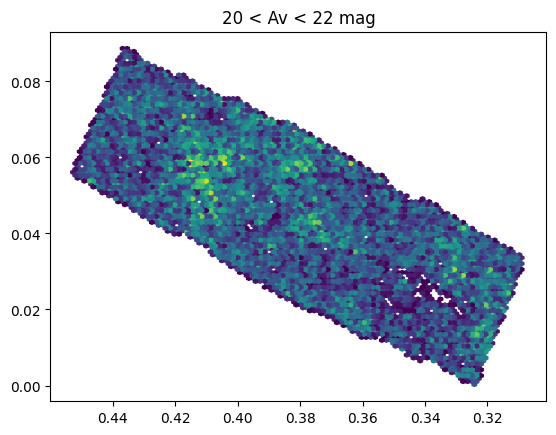

In [25]:
plt.hexbin(cat_use.catalog['skycoord_ref'].galactic.l[mask_20_22], cat_use.catalog['skycoord_ref'].galactic.b[mask_20_22], gridsize=100, cmap='viridis', mincnt=1)
plt.title('20 < Av < 22 mag')
plt.gca().invert_xaxis()

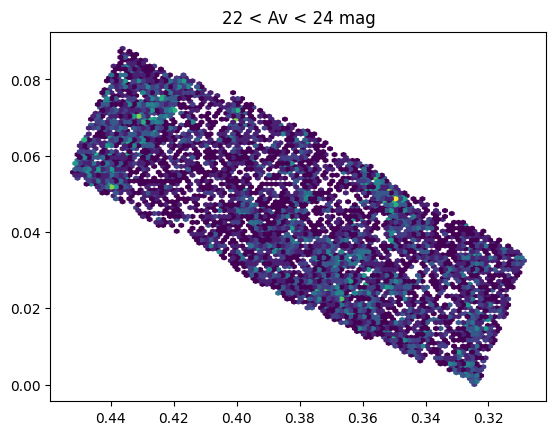

In [26]:
plt.hexbin(cat_use.catalog['skycoord_ref'].galactic.l[mask_22_24], cat_use.catalog['skycoord_ref'].galactic.b[mask_22_24], gridsize=100, cmap='viridis', mincnt=1)
plt.title('22 < Av < 24 mag')
plt.gca().invert_xaxis()

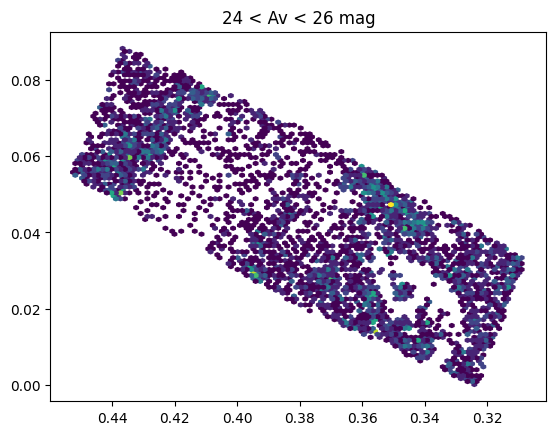

In [27]:
plt.hexbin(cat_use.catalog['skycoord_ref'].galactic.l[mask_24_26], cat_use.catalog['skycoord_ref'].galactic.b[mask_24_26], gridsize=100, cmap='viridis', mincnt=1)
plt.title('24 < Av < 26 mag')
plt.gca().invert_xaxis()

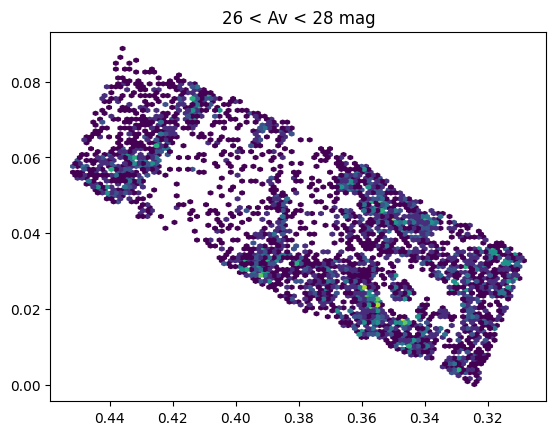

In [28]:
plt.hexbin(cat_use.catalog['skycoord_ref'].galactic.l[mask_26_28], cat_use.catalog['skycoord_ref'].galactic.b[mask_26_28], gridsize=100, cmap='viridis', mincnt=1)
plt.title('26 < Av < 28 mag')
plt.gca().invert_xaxis()

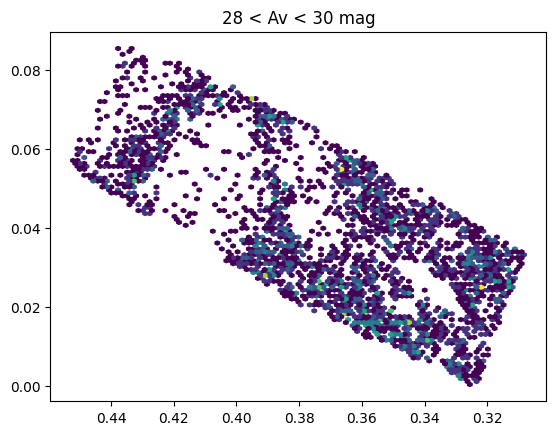

In [30]:
plt.hexbin(cat_use.catalog['skycoord_ref'].galactic.l[mask_28_30], cat_use.catalog['skycoord_ref'].galactic.b[mask_28_30], gridsize=100, cmap='viridis', mincnt=1)
plt.title('28 < Av < 30 mag')
plt.gca().invert_xaxis()

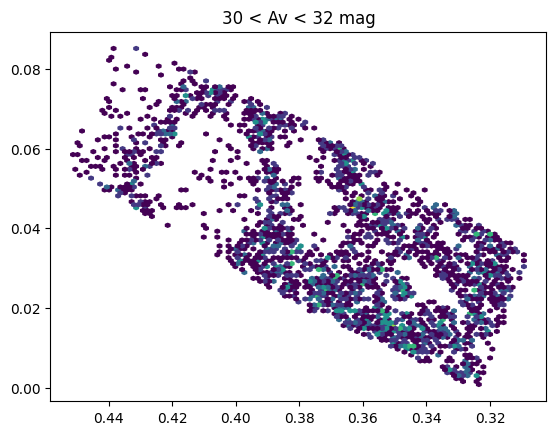

In [31]:
plt.hexbin(cat_use.catalog['skycoord_ref'].galactic.l[mask_30_32], cat_use.catalog['skycoord_ref'].galactic.b[mask_30_32], gridsize=100, cmap='viridis', mincnt=1)
plt.title('30 < Av < 32 mag')
plt.gca().invert_xaxis()

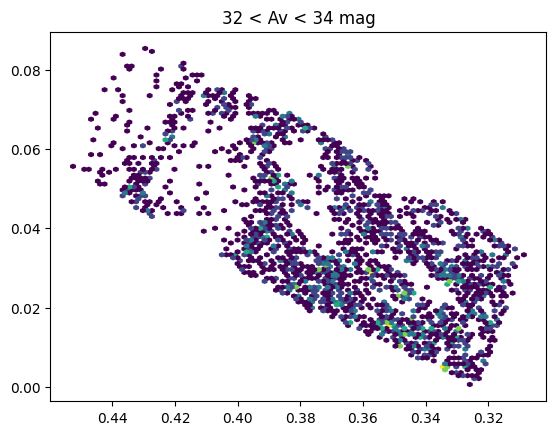

In [32]:
plt.hexbin(cat_use.catalog['skycoord_ref'].galactic.l[mask_32_34], cat_use.catalog['skycoord_ref'].galactic.b[mask_32_34], gridsize=100, cmap='viridis', mincnt=1)
plt.title('32 < Av < 34 mag')
plt.gca().invert_xaxis()

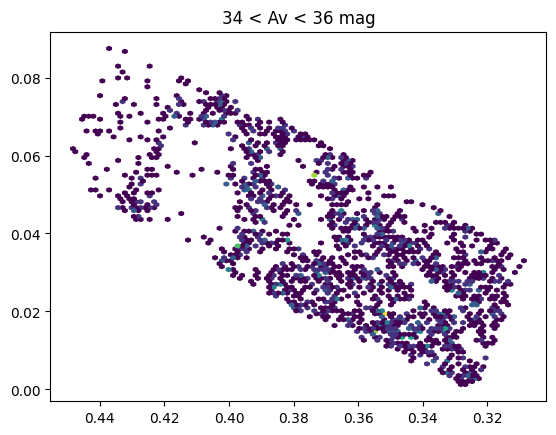

In [33]:
plt.hexbin(cat_use.catalog['skycoord_ref'].galactic.l[mask_34_36], cat_use.catalog['skycoord_ref'].galactic.b[mask_34_36], gridsize=100, cmap='viridis', mincnt=1)
plt.title('34 < Av < 36 mag')
plt.gca().invert_xaxis()